# Sect 25: Intro to Logistic Regression 

- online-ds-ft-100719
- 03/24/20

## Announcements

- **Sect 25 will be split into 2 study groups.**
- **Sect 26 doesn't introduce much/anything new**
    - It revisits gradient descent and applies it to Logistic Regression.
    - **We will discuss** some of the concepts re-introduced next study group.
    - **We will NOT have an entire study group** dedicated to section 26

## Topics in Sect 25

- For Today:
    - Supervised vs Unsupervised Learning
    - Logistic Regression
    - Evaluating Classifiers (part 1):
        - Confusion Matrices


- For Thursday:
    - Evaluating Classifiers (part 2)
    - Class Imbalance Problems

# Types of Machine Learning Models

<img src="https://raw.githubusercontent.com/jirvingphd/fsds_pt_100719_cohort_notes/master/Images/ai_machine_learning_deep_learning.png">

## Intro to Supervised Learning

> "The term **_Supervised Learning_** refers to a class of machine learning algorithms that can "learn" a task through **_labeled training data_**."

<img src="https://raw.githubusercontent.com/jirvingphd/dsc-intro-to-supervised-learning-v2-1-online-ds-pt-100719/master/images/new_ml-hierarchy.png" width=60%>

# From Linear Regression to Logistic Regression


<img src="https://raw.githubusercontent.com/learn-co-curriculum/ds-lessons-starter/master/logistic_regression/img/linear_vs_logistic_regression.jpg?token=AKWNGY4DACEK65UQB3MKJCC6P2MUS">

## How is it used?

### Linear Regression

Trying to find the **relationship** and predict a specific value.

- Examples of regressions:
    - House prices
    - Salary
    - Reviews/Ratings

### Classification

Trying to identify what features can predict which class a particular observation/row belongs to.
- Can be a "binary classification" 
    - "yes" or "no"
    - Survived or died.
    - Diabetic or not-diabetic
- Can also be a "multiclass classification"
    - Which type of flower?
    - Will a football game end one team winning, or the other team, or a tie?


## Recall Linear Regression

### Formula

$$ \large \hat y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \ldots + \beta_n x_n = \sum_{i=0}^{N} \beta_i x_i $$

- Output is specifying the **predicted value** for the target

## Classification: Use Logistic Regression

- Output is specifying the **probability** of belonging to a particular group

- Visual Example:
    - https://www.desmos.com/calculator/y2ilpxiqys

Transform from linear regression!

$$ \large \hat y = \sum_{i=0}^{N} \beta_i x_i $$

$$\large P = \displaystyle \frac{1}{1+e^{-\hat y}} = \frac{1}{1+e^{-\sum_{i=0}^{N} \beta_i x_i}} $$

$$ \large = \frac{1}{1+e^{-\beta_0}e^{-\beta_1 x_1}\ldots e^{-\beta_N x_N}} $$

# Implementing Logistic Regression

#### Predict Passenger Survival on Titanic

In [30]:
# !pip install fsds_100719
from fsds_100719.imports import *

In [31]:
df = fs.datasets.load_titanic(read_csv_kwds={'index_col':0})
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df['Survived'].value_counts(normalize=True,dropna=False)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

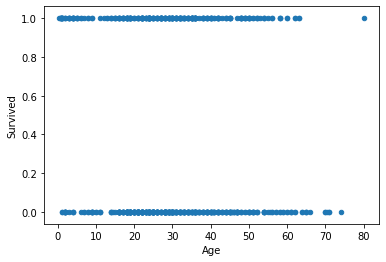

In [33]:
df.plot('Age','Survived',kind='scatter');

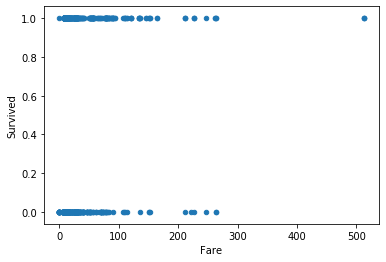

In [34]:
df.plot('Fare','Survived',kind='scatter');

### Q: What are the preprocessing steps I need to perform before I create the model?

- 

### A: 

- Address null values
- Encode categorical data
- Train-test-split
- Train Model with train data
- Evaluate Model with test data

### Preprocessing

In [35]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [36]:
df = df.fillna(0)
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [37]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass          object
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [38]:
## 
x_feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Cabin', 'Embarked']
X = pd.get_dummies(df[x_feats], drop_first=True)
y = df['Survived']
X.head() # Preview our data to make sure it looks reasonable

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,7.2500,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,38.0,1,71.2833,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,26.0,0,7.9250,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,35.0,1,53.1000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,35.0,0,8.0500,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [39]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.head()

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
331,45.5,0,28.5000,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
733,23.0,0,13.0000,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
382,32.0,0,7.9250,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
704,26.0,1,7.8542,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
813,6.0,4,31.2750,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_sca = pd.DataFrame( scaler.fit_transform(X_train), 
                           columns=X_train.columns, index=X_train.index)

X_test_sca = pd.DataFrame( scaler.transform(TraX_test),columns=X_test.columns,
                         index=X_test.index)

In [41]:
X_train_sca.describe().round(2).loc[['min','max']]

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [42]:
X_test_sca.describe().round(2).loc[['min','max']]

,Age,SibSp,Fare,Pclass_2,Pclass_3,Pclass_?,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
min,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.89,0.5,0.51,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0



## Fitting a Logistic Regression with sklearn

In [43]:
from sklearn.linear_model import LogisticRegression,LinearRegression

In [49]:
logreg = LogisticRegression(fit_intercept=True, penalty='none',max_iter=1000)#, solver='liblinear')
model_log1 = logreg.fit(X_train_sca, y_train)
model_log1

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear',
                           max_iter=1000)
model_log2 = logreg.fit(X_train, y_train)
model_log2

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
                   fit_intercept=False, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
logreg = LogisticRegression(max_iter=1000)#fit_intercept=False, C=1e12, solver='liblinear')
model_log3 = logreg.fit(X_train, y_train)
model_log3

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Evaluating Predictions - Confusion Matrix

- A **confusion matrix** separates our predictions into 4 types of outcomes (for a binary classification):
    - **_True Positives (TP)_**: The number of observations where the model predicted the person has the disease (1), and they actually do have the disease (1).

    - **_True Negatives (TN)_**: The number of observations where the model predicted the person is healthy (0), and they are actually healthy (0).

    - **_False Positives (FP)_**: The number of observations where the model predicted the person has the disease (1), but they are actually healthy (0). 

    - **_False Negatives (FN)_**: The number of observations where the model predicted the person is healthy (0), but they actually have the disease (1).

    <img src="https://raw.githubusercontent.com/learn-co-students/dsc-visualizing-confusion-matrices-lab-online-ds-ft-100719/master/images/new_confusion_matrix_2.png" width=50%>

In [65]:
from sklearn.metrics import confusion_matrix,plot_confusion_matrix,classification_report
from sklearn.metrics import accuracy_score

In [66]:
cm1 = confusion_matrix(y_test, model_log1.predict(X_test))
cm1

array([[  4, 101],
       [  0,  74]])

In [67]:
cm2 = confusion_matrix(y_test, model_log2.predict(X_test))
cm2

array([[87, 18],
       [23, 51]])

In [68]:
cm3 = confusion_matrix(y_test, model_log3.predict(X_test))
cm3

array([[89, 16],
       [22, 52]])

### Visualizing Confusion Matrices

In [136]:
cm = cm3.copy()
cm

array([[89, 16],
       [22, 52]])

In [137]:
cm[0].sum()

105

In [138]:
cm.sum(axis=1)

array([105,  74])

In [139]:
cm_norm = cm / cm.sum(axis=1)[:, np.newaxis]
cm_norm 

array([[0.84761905, 0.15238095],
       [0.2972973 , 0.7027027 ]])

In [140]:
cm_norm = cm_norm.round(3)
cm_norm

array([[0.848, 0.152],
       [0.297, 0.703]])

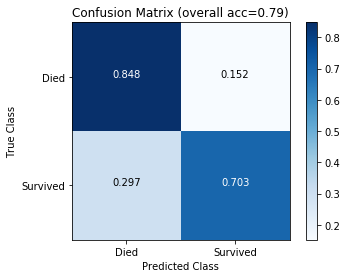

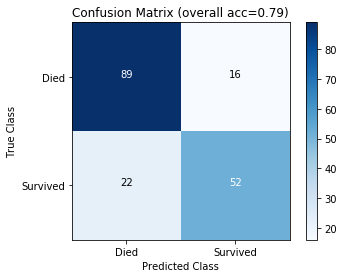

In [141]:
# Here we iterate through the confusion matrix and append labels to our visualization 
def plot_cm(cnf_matrix,thresh=0.5):
    import itertools
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(ticks=[0,1],labels=['Died','Survived'])
    plt.yticks(ticks=[0,1],labels=['Died','Survived'])

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.colorbar()
    
    acc = accuracy_score(y_test,model_log3.predict(X_test))
    plt.title(f"Confusion Matrix (overall acc={round(acc,2)})")
    plt.show()

    
plot_cm(cm_norm,thresh=0.5)
plot_cm(cm,thresh=40)

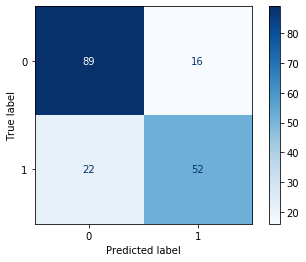

In [142]:
# ## Sklearn Now has a plot_confusion_matrix function (if update)
plot_confusion_matrix(model_log3,X_test,y_test,cmap="Blues")

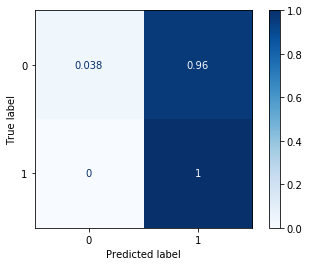

In [144]:
plot_confusion_matrix(model_log1,X_test,y_test,cmap="Blues",normalize='true')

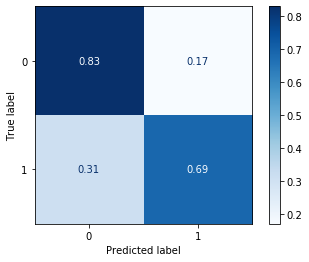

In [145]:
plot_confusion_matrix(model_log2,X_test,y_test,cmap="Blues",normalize='true')

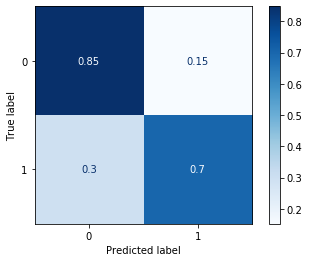

In [146]:
plot_confusion_matrix(model_log3,X_test,y_test,cmap="Blues",normalize='true')

### Other Metrics for Classification

- We will be discussing the other evaluation matrix for classifications on Thursday

### Fit a Logistic Regression with statsmodels

- From [Fitting a Logistic Regression Lab](https://learn.co/tracks/module-3-data-science-career-2-1/machine-learning/section-25-introduction-to-logistic-regression/fitting-a-logistic-regression-model-lab)

> "Now with everything in place, you can build a logistic regression model using `statsmodels` (make sure you create an intercept term as we showed in the previous lesson).  "
>> Warning: Did you receive an error of the form "LinAlgError: Singular matrix"? This means that `statsmodels` was unable to fit the model due to certain linear algebra computational problems. Specifically, the matrix was not invertible due to not being full rank. In other words, there was a lot of redundant, superfluous data. Try removing some features from the model and running it again.

In [147]:
# Build a logistic regression model using statsmodels
import statsmodels.api as sm
X_train_sca = sm.tools.add_constant(X_train_sca)
X_test_sca = sm.tools.add_constant(X_test_sca)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



In [148]:
logit_model = sm.Logit(y_train, X_train_sca)
result = logit_model.fit()

         Current function value: inf
         Iterations: 35


//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1736: RuntimeWarning:

overflow encountered in exp

//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1789: RuntimeWarning:

divide by zero encountered in log



LinAlgError: Singular matrix

In [149]:
X_train_sca.columns

Index(['const', 'Age', 'SibSp', 'Fare', 'Pclass_2', 'Pclass_3', 'Pclass_?',
       'Sex_male', 'Cabin_A10', 'Cabin_A14',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=158)

In [150]:
sm_cols = [col for col in X_train_sca.columns if "Cabin" not in col]
sm_cols.remove('Pclass_?')

In [151]:
 X_train_sca[sm_cols].head()

,const,Age,SibSp,Fare,Pclass_2,Pclass_3,Sex_male,Embarked_C,Embarked_Q,Embarked_S
331,1.0,0.56875,0.000,0.055628,0.0,0.0,1.0,0.0,0.0,1.0
733,1.0,0.28750,0.000,0.025374,1.0,0.0,1.0,0.0,0.0,1.0
382,1.0,0.40000,0.000,0.015469,0.0,1.0,1.0,0.0,0.0,1.0
704,1.0,0.32500,0.125,0.015330,0.0,1.0,1.0,0.0,0.0,1.0
813,1.0,0.07500,0.500,0.061045,0.0,1.0,0.0,0.0,0.0,1.0


In [152]:
logit_model = sm.Logit(y_train, X_train_sca[sm_cols])
result = logit_model.fit()
result.summary()

         Current function value: 0.460560
         Iterations: 35


//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      702
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Mar 2020   Pseudo R-squ.:                  0.3046
Time:                        18:47:48   Log-Likelihood:                -327.92
converged:                      False   LL-Null:                       -471.54
Covariance Type:            nonrobust   LLR p-value:                 1.321e-56
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.9129   1.87e+05      0.000      1.000   -3.66e+05    3.66e+05
Age           -0.5693      0.485     -1.173      0.241      -1.521       0.382
SibSp         -2.5116      0.839     -2.995      0.003      -4.156      -0.868
Fare           2.6490      1.387      1.910      0.056      -0.069       5.367
Pclass_2      -0.1142      0.299     -0.382      0.703      -0.700       0.472
Pclass_3      -1.2049      0.282     -4.278      0.000      -1.757      -0.653
Sex_male      -2.6478      0.212    -12.464      0.000      -3.064      -2.231
Embarked_C   -22.5647   1.87e+05     -0.000      1.000   -3.66e+05    3.66e+05
Embarked_Q   -22.9605   1.87e+05     -0.000      1.000   -3.66e+05    3.66e+05
Embarked_S   -23.1178   1.87e+05     -0.000      1.000   -3.66e+05    3.66e+05
==============================================================================
"""

In [153]:
logit_model = sm.Logit(y, sm.add_constant(X)[sm_cols])
result = logit_model.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.457317
         Iterations 26


//anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:1286: RuntimeWarning:

invalid value encountered in sqrt

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in greater

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:901: RuntimeWarning:

invalid value encountered in less

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1892: RuntimeWarning:

invalid value encountered in less_equal



<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      881
Method:                           MLE   Df Model:                            9
Date:                Tue, 24 Mar 2020   Pseudo R-squ.:                  0.3132
Time:                        18:47:48   Log-Likelihood:                -407.47
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 1.470e-74
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        149.6690        nan        nan        nan         nan         nan
Age           -0.0136      0.005     -2.513      0.012      -0.024      -0.003
SibSp         -0.3274      0.100     -3.290      0.001      -0.522      -0.132
Fare           0.0049      0.003      1.952      0.051   -2.04e-05       0.010
Pclass_2      -0.3633      0.270     -1.346      0.178      -0.892       0.166
Pclass_3      -1.4565      0.255     -5.710      0.000      -1.956      -0.957
Sex_male      -2.6599      0.192    -13.841      0.000      -3.037      -2.283
Embarked_C  -147.0168        nan        nan        nan         nan         nan
Embarked_Q  -147.4150        nan        nan        nan         nan         nan
Embarked_S  -147.5110        nan        nan        nan         nan         nan
==============================================================================
"""

In [154]:
# result.pred_table()

In [155]:
y_hat_test = result.predict(X_test_sca[sm_cols])
y_hat_test

709    0.181674
439    0.295184
840    0.123274
720    0.857423
39     0.759962
         ...   
433    0.123328
773    0.187826
25     0.891961
84     0.857168
10     0.659264
Length: 179, dtype: float64

In [156]:
pred_survived = y_hat_test>=0.5
pred_survived.astype(int)

709    0
439    0
840    0
720    1
39     1
      ..
433    0
773    0
25     1
84     1
10     1
Length: 179, dtype: int64

In [157]:
cm = confusion_matrix(y_test,pred_survived.astype(int))
cm

array([[88, 17],
       [22, 52]])

In [158]:
(88+17)

105

In [159]:
np.sum(cm[0])

105

In [160]:
np.sum(cm,axis=1)

array([105,  74])

In [161]:
cm_norm = cm/np.sum(cm,axis=1)
cm_norm

array([[0.83809524, 0.22972973],
       [0.20952381, 0.7027027 ]])

In [162]:
# Here we iterate through the confusion matrix and append labels to our visualization 
def plot_cm(cnf_matrix,thresh=0.5):
    import itertools
#     thresh=0.5
    plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) 

    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.xticks(ticks=[0,1],labels=['Died','Survived'])
    plt.yticks(ticks=[0,1],labels=['Died','Survived'])

    for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
            plt.text(j, i, cnf_matrix[i, j],
                     horizontalalignment='center',
                     color='white' if cnf_matrix[i, j] > thresh else 'black')
    plt.colorbar()
    plt.show()
    
    

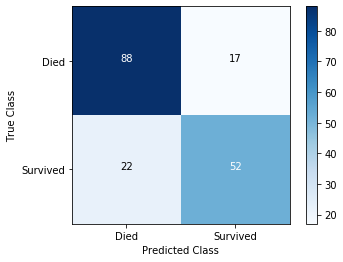

In [163]:
plot_cm(cm,thresh=40)

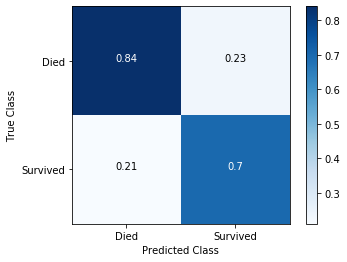

In [164]:

plot_cm(cm_norm.round(2))

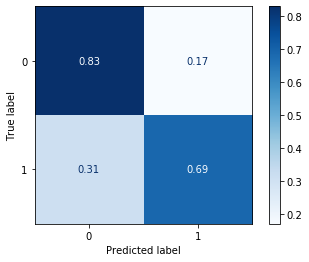

In [165]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model_log,X_test,y_test,normalize='true',cmap='Blues')